In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

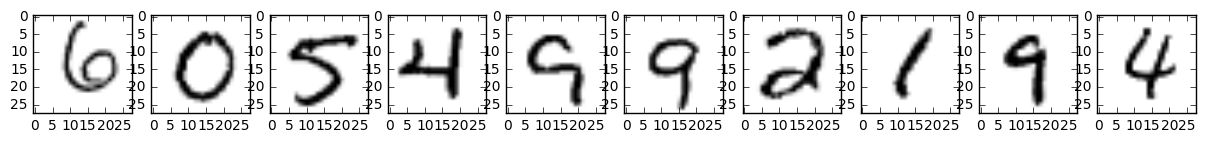

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
import tensorflow as tf
import tensorlayer as tl

In [7]:
# Set parameters
training_iteration = 10
batch_size = 500
display_step = 2

FLAGS = None

In [8]:
# TF graph input
x = tf.placeholder('float', [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder('float', [None,10]) # 0-9 digits recognition => 10 classes

In [9]:
network = tl.layers.InputLayer(x, name='input_layer')
network = tl.layers.DenseLayer(network, n_units=10,act = tf.nn.softmax, name='output_layer')

y_hat = network.outputs

  tensorlayer:Instantiate InputLayer  input_layer: (?, 784)
  tensorlayer:Instantiate DenseLayer  output_layer: 10, softmax


In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_hat,y))

In [11]:
train_params = network.all_params
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.AdamOptimizer()
    learn     = optimizer.minimize(cost, var_list=train_params)

In [14]:
# Initializing the variables
init = tf.initialize_all_variables()

# Merge all summaries into a single operator
merged_summary_op = tf.merge_all_summaries()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [13]:
# Launch the graph
sess = tf.InteractiveSession()
sess.run(init)

In [14]:
# Test the model, Calculate accuracy
prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [15]:
# train the network
tl.utils.fit(sess, network, learn, cost, mnist.train.images, mnist.train.labels, x, y,
             acc=acc, batch_size=500, n_epoch=10, print_freq=1, 
             X_val=mnist.test.images, y_val=mnist.test.labels, eval_train=False)


Start training the network ...
Epoch 1 of 10 took 0.306548s
   val loss: 1.755367
   val acc: 0.821600
Epoch 2 of 10 took 0.291349s
   val loss: 1.659387
   val acc: 0.874400
Epoch 3 of 10 took 0.292975s
   val loss: 1.624859
   val acc: 0.892100
Epoch 4 of 10 took 0.306028s
   val loss: 1.606092
   val acc: 0.901400
Epoch 5 of 10 took 0.298029s
   val loss: 1.594199
   val acc: 0.905400
Epoch 6 of 10 took 0.296016s
   val loss: 1.586268
   val acc: 0.907900
Epoch 7 of 10 took 0.298922s
   val loss: 1.579750
   val acc: 0.910500
Epoch 8 of 10 took 0.292063s
   val loss: 1.574773
   val acc: 0.911900
Epoch 9 of 10 took 0.295412s
   val loss: 1.570647
   val acc: 0.914800
Epoch 10 of 10 took 0.297733s
   val loss: 1.567571
   val acc: 0.916100
Total training time: 3.335147s


In [16]:
# evaluation
tl.utils.test(sess, network, acc, mnist.test.images, mnist.test.labels, x, y, batch_size=None)

Start testing the network ...
   test acc: 0.916100


In [17]:
# test item #100 is a "six"
pixels = mnist.test.images[100]

result = sess.run(y_hat, feed_dict={x:[pixels]})
dict(zip(range(10), result[0]))

{0: 0.00028389919,
 1: 4.9119692e-05,
 2: 0.0040793396,
 3: 0.00012566692,
 4: 0.00066394167,
 5: 2.2107879e-06,
 6: 0.99300158,
 7: 1.7249e-05,
 8: 0.0016052418,
 9: 0.00017176484}

In [18]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

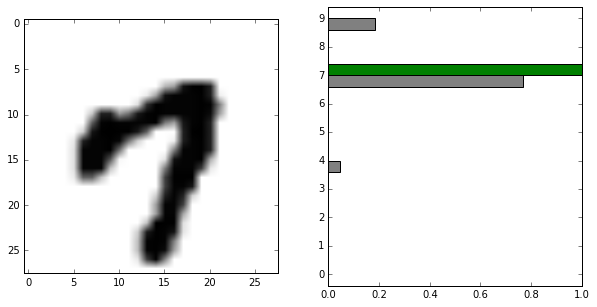

In [36]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = sess.run(y_hat, feed_dict={x:[pixels]})[0]

test_render(pixels, result, truth)

In [20]:
# Close the Session when we're done.
# sess.close()